<a href="https://colab.research.google.com/github/prt180/tensorflow/blob/main/TensorflowLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Introduction to Regression with Neural Networks in Tf.

In [41]:
print(tf.__version__)

2.8.2


Creating Data to view and fit.

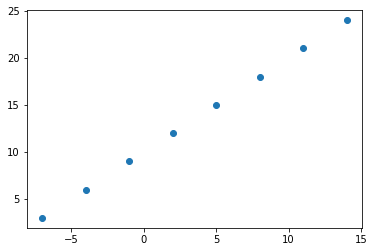

In [42]:
# Create feaures
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [43]:
y = X + 10

Input and output shapes

In [44]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedrrom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrrom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [45]:
X.shape, y.shape

((8,), (8,))

In [46]:
X.ndim

1

In [47]:
X[0].shape, X[0].ndim

((), 0)

In [48]:
# Turn on NumPy arrays into tensors 
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [49]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

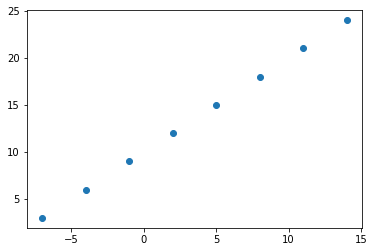

In [50]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

In [51]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.MAE, 
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
1/1 [==============================] - 0s 308ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [52]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [53]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [54]:
y_pred + 11

array([[23.71602]], dtype=float32)

# Improving a model
We can improve our model, by altering the steps we took to create model.
1. adding more hidden layers or adding more neurons.
2. altering optimization function
3. fit model for more epochs 

In [55]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"]
              )

model2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 474ms/step - loss: 14.0765 - mae: 14.0765
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4881 - mae: 13.4881
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9020 - mae: 12.9020
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3165 - mae: 12.3165
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7299 - mae: 11.7299
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1404 - mae: 11.1404
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5465 - mae: 10.5465
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9469 - mae: 9.9469
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3402 - mae: 9.3402
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7252 - mae: 8.7252
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 8.

In [56]:
y2_pred = model2.predict([17.0])
y2_pred

array([[28.825218]], dtype=float32)

In [57]:
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

Evaluting a model

visualize, visualize, visualize
1. Visualize data
2. Visualize model
3. visualize training model
4. visualize prediction  

In [58]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [59]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

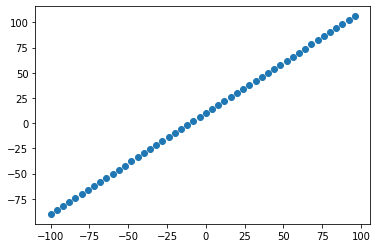

In [60]:
# Visualize a data
plt.scatter(X, y)

### The 3 sets...

* Training set 
* Validation set
* Test set

In [61]:
len(X)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [62]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

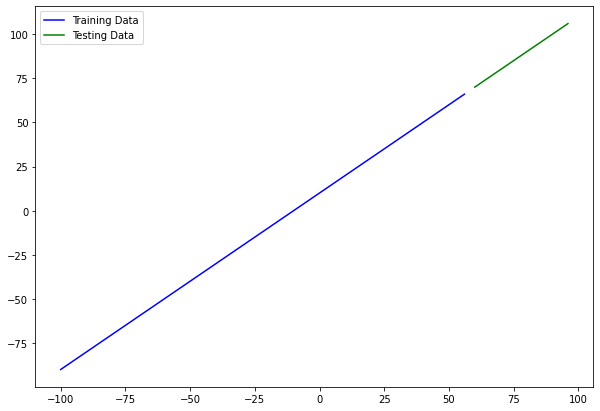

In [63]:
# Visualize 
plt.figure(figsize=(10, 7))
plt.plot(X_train, y_train, c='b', label="Training Data")
plt.plot(X_test, y_test, c='g', label="Testing Data")
plt.legend()

In [64]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["MAE"])
model3.summary()

ValueError: ignored

In [76]:
# Let's Create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [77]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, epochs = 1000, verbose=0) # verbose is for showing output 0- no output 1,2 for output

In [79]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


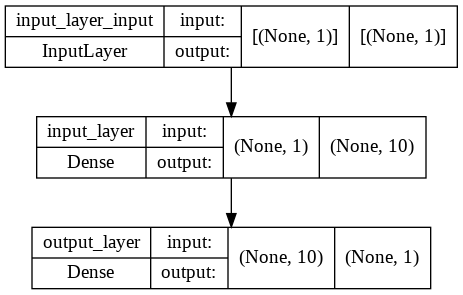

In [81]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)